In [114]:
install.packages("ISLR")

Warning message:
"package 'ISLR' is in use and will not be installed"

# 1) This question involves the use of simple linear regression on the Auto data set.

# (a)Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:

In [169]:
Data = read.table(file = "Auto.data")

In [116]:
head(Data)

V1,V2,V3,V4,V5,V6,V7,V8,V9
mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino


In [117]:
library("ISLR")
lm.fit <- lm(mpg ~ horsepower, data = Data)
summary(lm.fit)
# http://www.learnbymarketing.com/tutorials/explaining-the-lm-summary-in-r/
# Explaining the lm() Summary in R


Call:
lm(formula = mpg ~ horsepower, data = Data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


# i. Is there a relationship between the predictor and the response?

p-value: < 2.2e-16 

p-value gần bằng 0 nên có quan hệ thống kê.

# ii. How strong is the relationship between the predictor and the response?


Adjusted R-squared:  0.6049 

Giá trị R-squared cho biết khoảng 60.49% dữ liệu mpg có ảnh hưởng đến horsepower.

# iii. Is the relationship between the predictor and the response positive or negative?

Giá trị hệ số cho horsepower của mô hình là negative, vì vậy mối quan hệ là negative.

# iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

In [118]:
# The prediction 85% interval
predict(lm.fit, data.frame(horsepower = c(85)), interval ="prediction")

fit,lwr,upr
26.51906,16.85857,36.17954


In [119]:
# The 95% confidence interval
predict(lm.fit, data.frame(horsepower = c(95)), interval ="confidence")

fit,lwr,upr
24.94061,24.4389,25.44232


prediction range lớn hơn confidence range

# (b) Plot the response and the predictor. Use the abline() function to display the least squares regression line

The following objects are masked from Data (pos = 3):

    V1, V2, V3, V4, V5, V6, V7, V8, V9

The following objects are masked from Data (pos = 4):

    V1, V2, V3, V4, V5, V6, V7, V8, V9

The following objects are masked from Data (pos = 5):

    V1, V2, V3, V4, V5, V6, V7, V8, V9

The following objects are masked from Data (pos = 6):

    V1, V2, V3, V4, V5, V6, V7, V8, V9



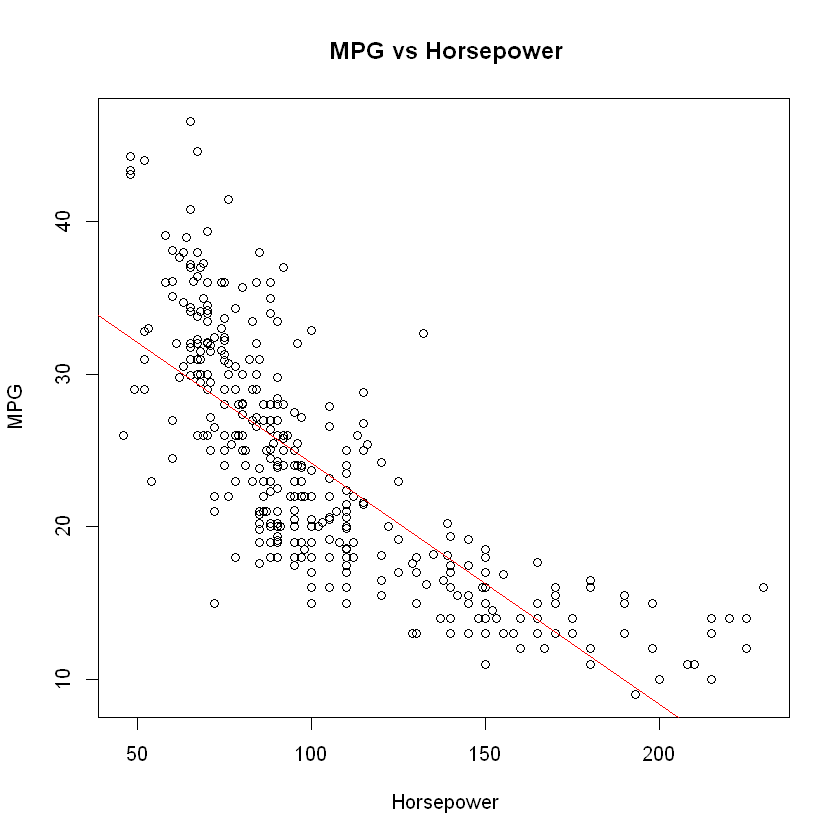

In [120]:
attach(Data)
plot(mpg~horsepower, main =" MPG vs Horsepower", xlab = " Horsepower", ylab ="MPG")
abline(coef = coef(lm.fit), col ="red")

In [121]:
detach(Data)

# (c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit

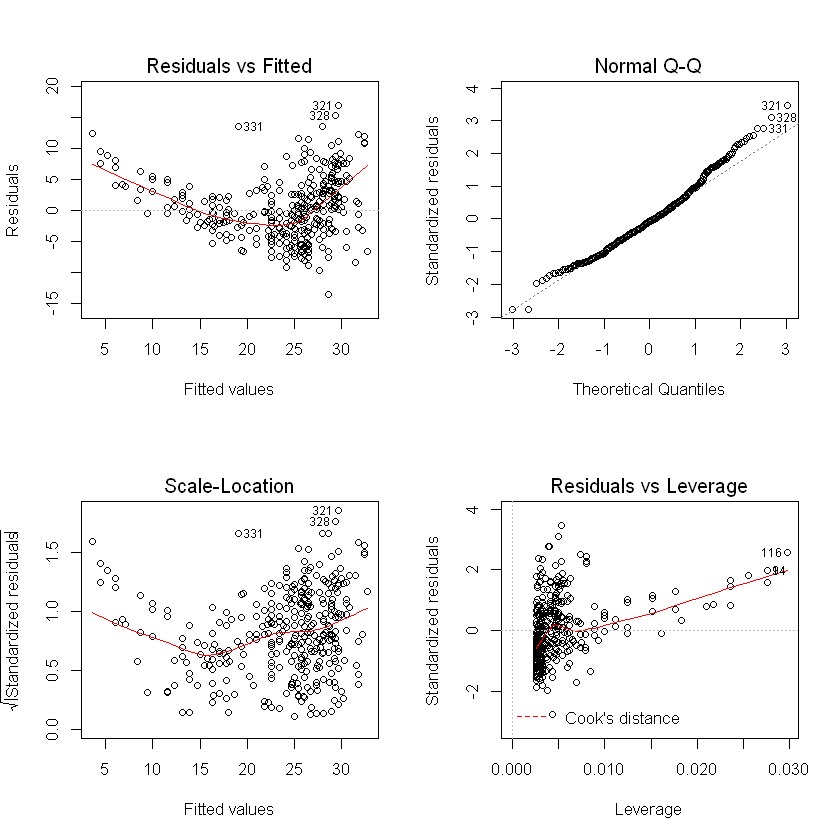

In [122]:
par(mfrow=c(2,2))
plot(lm.fit)

plot 1 cho thấy mối quan quan hệ phi tuyến giữa residuals và fitted values.

plot 2 cho thấy residuals là phân phối bình thường.

plot 3 cho thấy phương sai của lỗi là hằng số.

plot 4 cho thấy không có leverage points trong dữ liệu.

# 2) This question involves the use of multiple linear regression on the Auto data set.

# (a) Produce a scatterplot matrix which includes all of the variables in the data set.

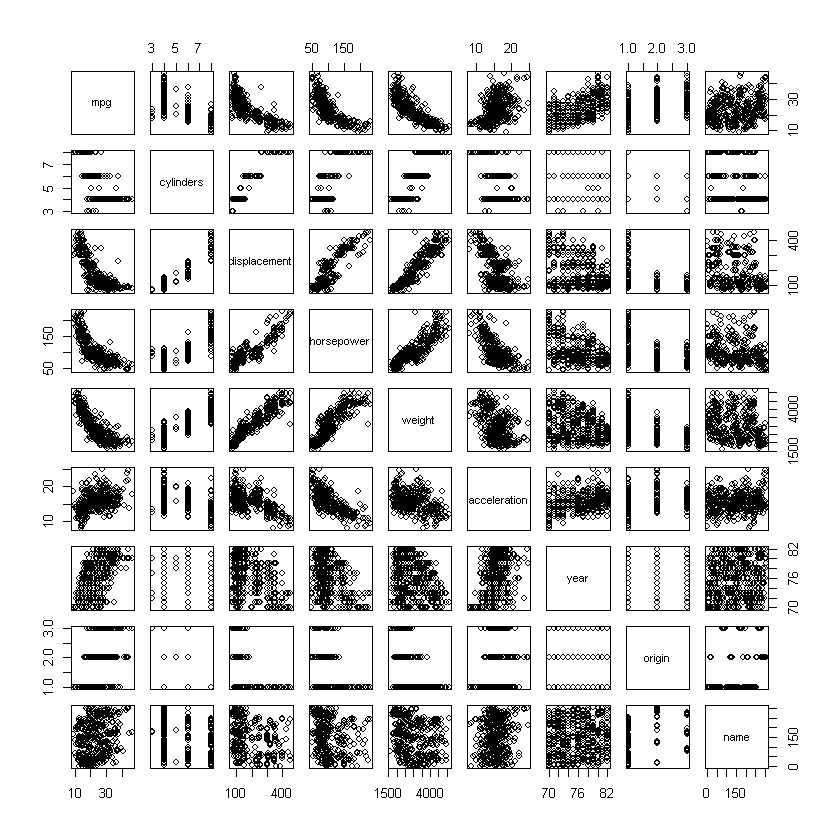

In [183]:
library("ISLR")
pairs(Auto)

# (b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.

In [185]:
str(Auto)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : num  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : num  3504 3693 3436 3433 3449 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : num  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 304 levels "amc ambassador brougham",..: 49 36 231 14 161 141 54 223 241 2 ...


In [187]:
cor(Auto[, names(Auto) !="name"])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


# (c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:

In [190]:
model = lm(mpg ~. -name, data = Auto)
summary(model)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


# i. Is there a relationship between the predictors and the response?

có, vì giá trị p-value gần bằng 0 và R-squared khá cao.

# ii. Which predictors appear to have a statistically significant relationship to the response?

(*)
displacement, weight, year và origin.

# iii. What does the coefficient for the year variable suggest?

mph tăng qua mỗi năm.